In [ ]:
# Wolf 및 Dog 폴더에 파일이 있으면 사용하지 않는것을 권유드립니다.

import sys
import os 
import shutil

# 원본 파일 복사하기
wolf_origin_path = r'Dog_Wolf_Training\Origin\Wolfs_origin'
wolf_path = r'Dog_Wolf_Training\Origin\Wolfs'

dog_origin_path = r'Dog_Wolf_Training\Origin\Dogs_origin'
dog_path = r'Dog_Wolf_Training\Origin\Dogs'


for f in os.listdir(wolf_origin_path):
    src = os.path.join(wolf_origin_path, f)
    dsr = os.path.join(wolf_path, f)
    shutil.copyfile(src,dsr)
    
for f in os.listdir(dog_origin_path):
    src = os.path.join(dog_origin_path, f)
    dsr = os.path.join(dog_path, f)
    shutil.copyfile(src,dsr)


# 복사본 생성이 되었다면 아래부터

In [ ]:
import sys
import os 
import shutil

# 파일명 변경하기
# 늑대 wolf

wolf_path = r'Dog_Wolf_Training\Origin\Wolfs'
dog_path = r'Dog_Wolf_Training\Origin\Dogs'

wolf_image_list = os.listdir(wolf_path)
wolf_image_list

for i, item in enumerate(wolf_image_list):
    origin_file = os.path.join(wolf_path,item)
    rename_file = os.path.join(wolf_path,'wolf_{}.jpg'.format(i))
    try:
        os.rename(origin_file, rename_file)
    except:
        print("이미 있는 파일 : ",rename_file)
    
# 개 Dogs

dog_image_list = os.listdir(dog_path)
dog_image_list

for i, item in enumerate(dog_image_list):
    origin_file = os.path.join(dog_path,item)
    rename_file = os.path.join(dog_path,'dog_{}.jpg'.format(i))
    try:
        os.rename(origin_file, rename_file)
    except:
        print("이미 있는 파일 : ",rename_file)


In [ ]:
# 이미지 크기 변경하기 300 X 300

import glob
from PIL import Image

input_path = dog_path + '/*.jpg'
file_list = [file for file in glob.glob(input_path)]

img_resize_list = []

for f in file_list:
    img = Image.open(f)
    img = img.resize((300,300))
    img = img.convert('RGB')
    img.save(f)

## Wolf
input_path = wolf_path + '/*.jpg'
file_list = [file for file in glob.glob(input_path)]

img_resize_list = []

for f in file_list:
    img = Image.open(f)
    img = img.resize((300,300))
    img = img.convert('RGB')
    img.save(f)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

import pandas as pd
import numpy as np

import tensorflow as tf
import matplotlib.pyplot as plt

import sys
import os 
import shutil

base_dir = r'Dog_Wolf_Training'
dog_origin_dir = r'Dog_Wolf_Training\Origin\Dogs'
wolf_origin_dir = r'Dog_Wolf_Training\Origin\Wolfs'

# 1. 폴더 구성하기

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

try:
    os.mkdir(train_dir)
except:
    print(train_dir,"이미 존재합니다.")

try:
    os.mkdir(validation_dir)
except:
    print(validation_dir,"이미 존재합니다.")

try:
    os.mkdir(test_dir)
except:
    print(test_dir,"이미 존재합니다.")


#######################################
train_wolfs_dir = os.path.join(train_dir, 'Wolfs')
train_dogs_dir = os.path.join(train_dir, 'Dogs')

validation_wolfs_dir = os.path.join(validation_dir, 'Wolfs')
validation_dogs_dir = os.path.join(validation_dir, 'Dogs')

test_wolfs_dir = os.path.join(test_dir, 'Wolfs')
test_dogs_dir = os.path.join(test_dir, 'Dogs')
#######################################
################### 폴더 생성 
# 학습용 늑대
try:
    os.mkdir(train_wolfs_dir)
except:
    if os.path.exists(train_wolfs_dir):
        shutil.rmtree(train_wolfs_dir)
        
    os.mkdir(train_wolfs_dir)

# 학습용 개
try:
    os.mkdir(train_dogs_dir)
except:
    if os.path.exists(train_dogs_dir):
        shutil.rmtree(train_dogs_dir)
        
    os.mkdir(train_dogs_dir)

# 확인용 늑대
try:
    os.mkdir(validation_wolfs_dir)
except:
    if os.path.exists(validation_wolfs_dir):
        shutil.rmtree(validation_wolfs_dir)
        
    os.mkdir(validation_wolfs_dir)

# 확인용 개
try:
    os.mkdir(validation_dogs_dir)
except:
    if os.path.exists(validation_dogs_dir):
        shutil.rmtree(validation_dogs_dir)
        
    os.mkdir(validation_dogs_dir)

# 테스트 늑대
try:
    os.mkdir(test_wolfs_dir)
except:
    if os.path.exists(test_wolfs_dir):
        shutil.rmtree(test_wolfs_dir)
        
    os.mkdir(test_wolfs_dir)
# 테스트 개
try:
    os.mkdir(test_dogs_dir)
except:
    if os.path.exists(test_dogs_dir):
        shutil.rmtree(test_dogs_dir)
        
    os.mkdir(test_dogs_dir)

#############################################

Dog_Wolf_Training\train 이미 존재합니다.
Dog_Wolf_Training\validation 이미 존재합니다.
Dog_Wolf_Training\test 이미 존재합니다.


In [24]:
## 2. 파일 구분하기

wolf_data_train_start = 0
wolf_data_train_end = 250

wolf_data_validation_start = 250
wolf_data_validation_end = 300

wolf_data_test_start = 300
wolf_data_test_end = 350




# 트레이닝
# 늑대
fnames = ['wolf_{}.jpg'.format(i) for i in range(250)]

for f in fnames:
    src = os.path.join(wolf_origin_dir, f)
    dsr = os.path.join(train_wolfs_dir, f)
    
    shutil.copyfile(src,dsr)
    
# 개
fnames = ['dog_{}.jpg'.format(i) for i in range(250)]

for f in fnames:
    src = os.path.join(dog_origin_dir, f)
    dsr = os.path.join(train_dogs_dir, f)
    
    shutil.copyfile(src,dsr)
    
### 확인용 데이터
# 늑대
fnames = ['wolf_{}.jpg'.format(i) for i in range(250,300)]

for f in fnames:
  src = os.path.join(wolf_origin_dir, f)
  dsr = os.path.join(validation_wolfs_dir, f)

  shutil.copyfile(src, dsr)
  
# 개
fnames = ['dog_{}.jpg'.format(i) for i in range(250,300)]

for f in fnames:
  src = os.path.join(dog_origin_dir, f)
  dsr = os.path.join(validation_dogs_dir, f)

  shutil.copyfile(src, dsr)
  
### 테스트 데이터
# 늑대
fnames = ['wolf_{}.jpg'.format(i) for i in range(300,350)]

for f in fnames:
  src = os.path.join(wolf_origin_dir, f)
  dsr = os.path.join(test_wolfs_dir, f)

  shutil.copyfile(src, dsr)
  
# 개
fnames = ['dog_{}.jpg'.format(i) for i in range(300,350)]

for f in fnames:
  src = os.path.join(dog_origin_dir, f)
  dsr = os.path.join(test_dogs_dir, f)

  shutil.copyfile(src, dsr)

# 첫번째 학습방법

In [25]:
# 3. 모델 구성하기
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

In [26]:
# 4. 이미지 전처리

# 이미지 데이터를 변형처리하는 객체
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

# 이미지 데이터를 가져오는 객체

# 데이터를 불러오는 객체
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [27]:
# 첫번째 모델 학습

history = model.fit(train_generator,
          epochs=15,
          validation_data=test_generator)

          # steps_per_epoch=25,
          #validation_steps=25)

Epoch 1/15
25/25 [==============================] - 9s 310ms/step - loss: 0.7247 - accuracy: 0.5180 - val_loss: 0.6873 - val_accuracy: 0.5500
Epoch 2/15
25/25 [==============================] - 7s 292ms/step - loss: 0.6568 - accuracy: 0.6100 - val_loss: 0.8208 - val_accuracy: 0.5000
Epoch 3/15
25/25 [==============================] - 7s 280ms/step - loss: 0.6466 - accuracy: 0.6660 - val_loss: 0.6117 - val_accuracy: 0.7100
Epoch 4/15
25/25 [==============================] - 7s 272ms/step - loss: 0.5594 - accuracy: 0.7360 - val_loss: 0.7217 - val_accuracy: 0.5300
Epoch 5/15
25/25 [==============================] - 7s 271ms/step - loss: 0.5422 - accuracy: 0.7600 - val_loss: 0.5716 - val_accuracy: 0.7300
Epoch 6/15
25/25 [==============================] - 7s 276ms/step - loss: 0.4767 - accuracy: 0.7760 - val_loss: 0.5838 - val_accuracy: 0.7600
Epoch 7/15
25/25 [==============================] - 7s 274ms/step - loss: 0.3475 - accuracy: 0.8680 - val_loss: 0.6409 - val_accuracy: 0.7600
Epoch 

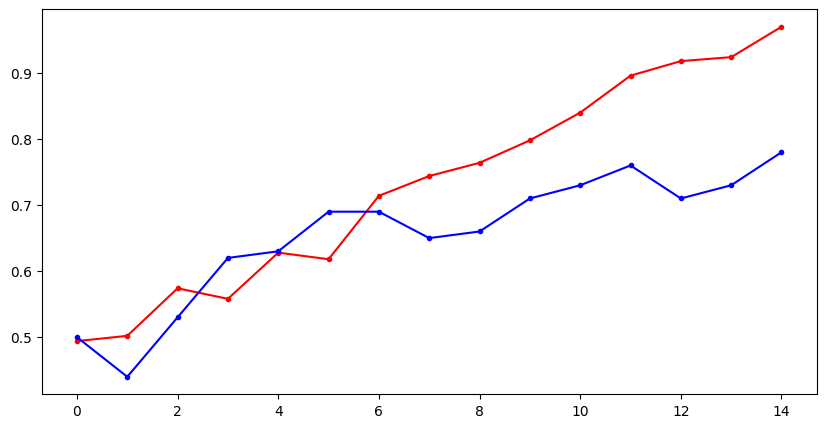

In [15]:
fig = plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], marker='.', color='r')
plt.plot(history.history['val_accuracy'], marker='.', color='b')

5/5 [==============================] - 0s 82ms/step
[0.7757339]
[0.99604625]
[0.00024251]
[0.99945265]
[0.4438174]
[1.15425176e-10]
[1.1825637e-07]
[0.00149057]
[8.182336e-07]
[0.00224003]
[0.00936127]
[0.00021093]
[0.66059697]
[0.9298891]
[0.39066514]
[0.9995096]


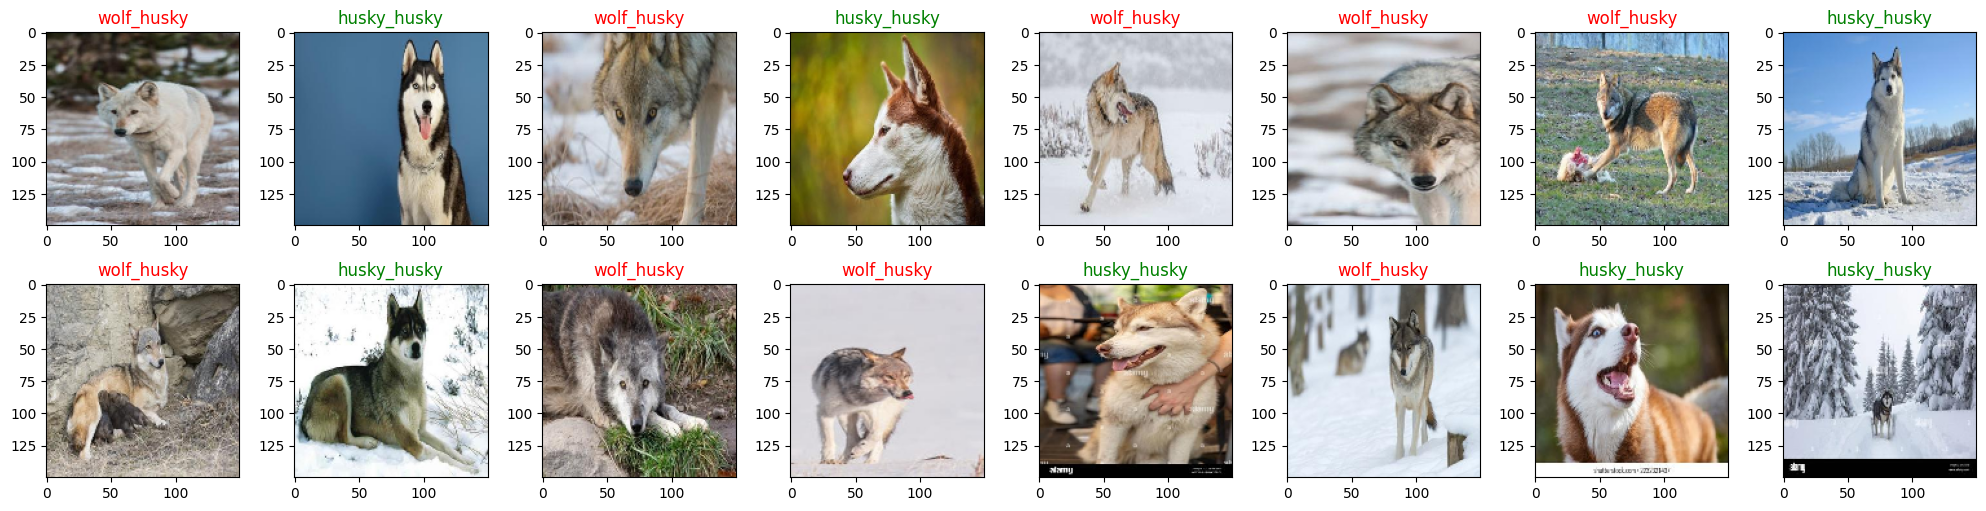

In [29]:
preds = model.predict(test_generator)


class_labels =['husky','wolf']

batch = next(test_generator)
images, labels = batch[0], batch[1]

fig = plt.figure(figsize=(20,10))

for i in range(16):
    ax = plt.subplot(4,8,i + 1)
    
    ax.imshow(images[i])
    
    pred_idx = np.argmax(preds[i])
    label_idx = labels[i].astype(np.int16)
    print(preds[i])
    plt.title(class_labels[label_idx])
    ax.set_title("{}_{}".format(class_labels[label_idx], class_labels[pred_idx]), color ='green' if label_idx == pred_idx else 'red')
plt.tight_layout()
plt.show()


In [ ]:
batch = next(test_generator)
images, labels = batch[0], batch[1]
labels

In [ ]:
len(images)

# 두번째 학습방법 


In [17]:
# 2번째 학습방법 

# 이미지를 변형 및 증폭하는 객체
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)




Found 500 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())


model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 17, 17, 128)      

In [19]:
hist = model.fit(
    train_generator,
    epochs=25,
    validation_data = validation_generator
)

Epoch 1/25
25/25 [==============================] - 9s 308ms/step - loss: 0.7061 - accuracy: 0.4820 - val_loss: 0.6931 - val_accuracy: 0.5200
Epoch 2/25
25/25 [==============================] - 8s 310ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 3/25
25/25 [==============================] - 8s 306ms/step - loss: 0.6941 - accuracy: 0.5060 - val_loss: 0.6920 - val_accuracy: 0.5700
Epoch 4/25
25/25 [==============================] - 8s 299ms/step - loss: 0.6901 - accuracy: 0.5460 - val_loss: 0.7096 - val_accuracy: 0.5000
Epoch 5/25
25/25 [==============================] - 8s 310ms/step - loss: 0.6857 - accuracy: 0.5900 - val_loss: 0.7069 - val_accuracy: 0.5000
Epoch 6/25
25/25 [==============================] - 8s 329ms/step - loss: 0.6635 - accuracy: 0.5880 - val_loss: 0.6886 - val_accuracy: 0.5800
Epoch 7/25
25/25 [==============================] - 9s 341ms/step - loss: 0.6518 - accuracy: 0.6220 - val_loss: 0.7146 - val_accuracy: 0.6500
Epoch 

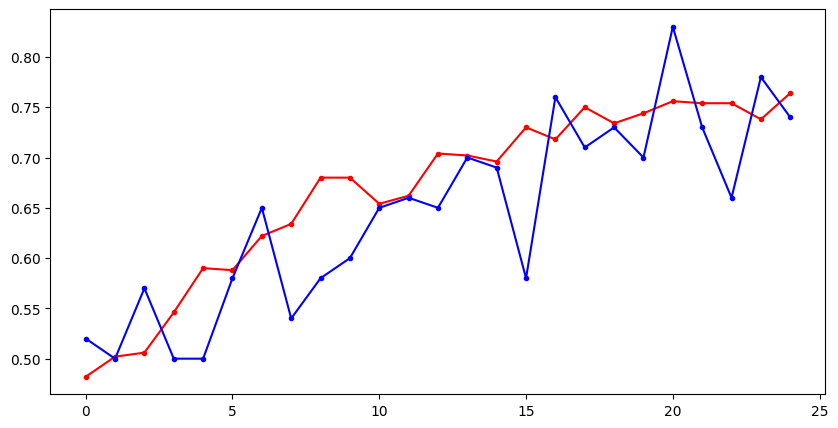

In [20]:
fig = plt.figure(figsize=(10,5))
plt.plot(hist.history['accuracy'], marker='.', color='r')
plt.plot(hist.history['val_accuracy'], marker='.', color='b')


부가코드
---

5/5 [==============================] - 0s 63ms/step
1 / 0
1 / 0
1 / 0
0 / 0
1 / 0
1 / 0
0 / 0
0 / 0
0 / 0
0 / 0
1 / 0
0 / 0
0 / 0
0 / 0
1 / 0
0 / 0


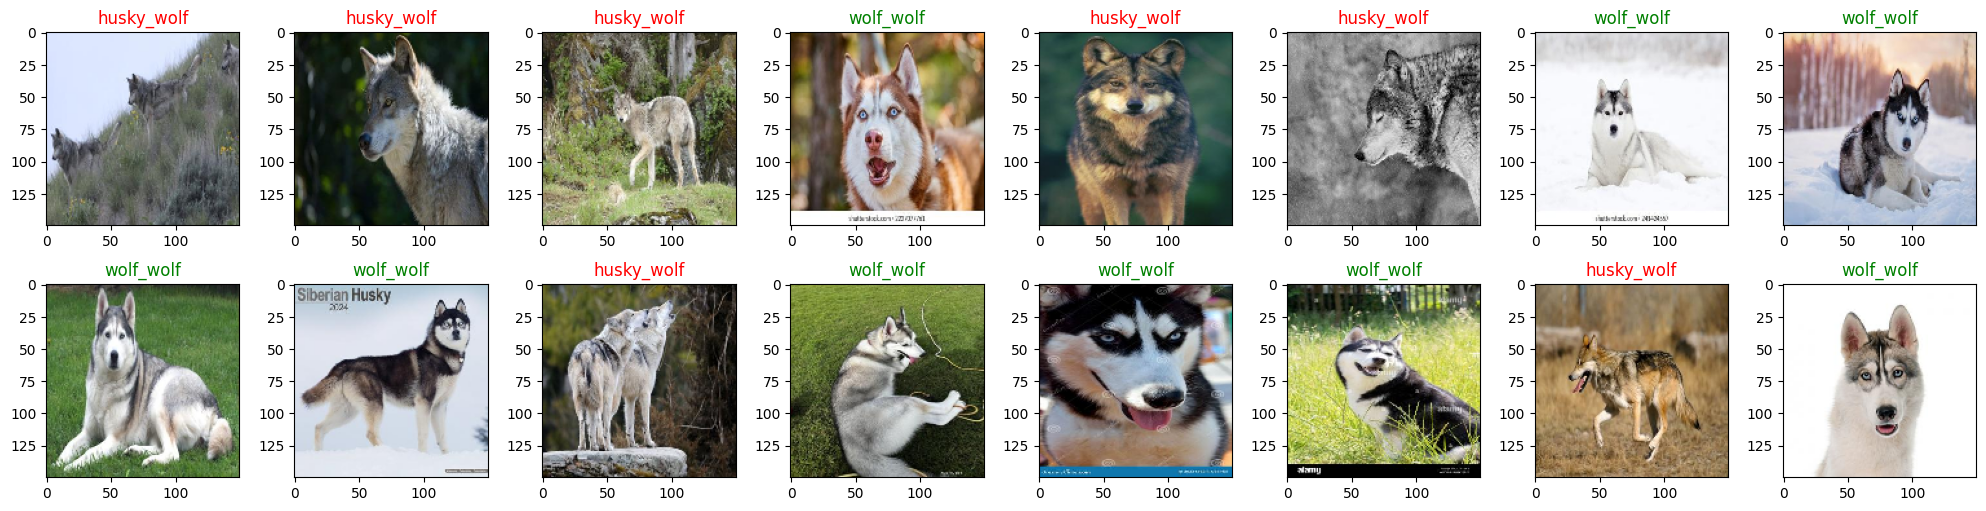

In [23]:
preds = model.predict(validation_generator)

class_labels =['wolf','husky']

batch = next(validation_generator)
images, labels = batch[0], batch[1]

fig = plt.figure(figsize=(20,10))

for i in range(16):
    ax = plt.subplot(4,8,i + 1)
    
    ax.imshow(images[i])
   
    pred_idx = np.argmax(preds[i])
    label_idx = labels[i].astype(np.int16)
    print(label_idx, "/", pred_idx)
    plt.title(class_labels[label_idx])
    ax.set_title("{}_{}".format(class_labels[label_idx], class_labels[pred_idx]), color ='green' if label_idx == pred_idx else 'red')
plt.tight_layout()
plt.show()


In [ ]:
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
from urllib.request import urlretrieve

url = 'https://www.google.com/imghp'
driver = webdriver.Chrome()
driver.get(url)
time.sleep(1)

kw = 'волк'  # wolf 러시아어
# シベリアンハスキー 일본어
# Husky sibérien
# 늑대 한국어
# wolf 영어 

elem = driver.find_element(By.ID, 'APjFqb')
elem.send_keys(kw)
elem.send_keys(Keys.RETURN) # 엔터키
time.sleep(2) # 로딩 시간

# 스크롤을 끝까지 내리는 코드
SCROLL_PAUSE_TIME = 2
last_height = driver.execute_script("return document.body.scrollHeight")

while True: 
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(SCROLL_PAUSE_TIME)

    new_height = driver.execute_script('return document.body.scrollHeight')
    if new_height == last_height:
        try:
            time.sleep(SCROLL_PAUSE_TIME)
            driver.find_element(By.CSS_SELECTOR, "input.mye4qd").click()
        except:
            break
    last_height = new_height

    time.sleep(1)
    
    # 더 보기 버튼 클릭
    try: 
        more_btn = driver.find_element(By.CSS_SELECTOR, '#islmp > div > div > div > div > div.C5Hr4 > div.K414Oe > div.FAGjZe > input')
        more_btn.click()
    except:
        pass

elems = driver.find_elements(By.CSS_SELECTOR, '#islrg > div.islrc > div div > a.FRuiCf.islib.nfEiy > div.fR600b.islir > img')

for i, elem in enumerate(elems):
    try:
        elem.click()
        time.sleep(1)
        elem = driver.find_element(By.XPATH, '//*[@id="Sva75c"]/div[2]/div[2]/div[2]/div[2]/c-wiz/div/div/div/div/div[3]/div[1]/a/img[1]')
        img_url = elem.get_attribute('src')
        print(img_url)
        file_name = r'C:\\Python\\Pandas\\deeplearning\\husky\\' + img_url.split('/')[-1]
        urlretrieve(img_url, file_name)
        print(file_name)
    except:
        pass
    
    

In [ ]:
# 이미지를 변형 및 증폭하는 객체
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
    vertical_flip = True)